# Ayush Soni, Angadi Abhinay --- Churn Prediction --- Final_Project

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

### Loading the Data

In [2]:
#importing the dataset

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
#knowing the shape of the dataset
df.shape

(7043, 21)

In [5]:
#printig the unique values from the dataset
df_columns = df.columns.tolist()

for col in df_columns:
    print(f"{col} unique values: {df[col].unique()}")

customerID unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values: ['Female' 'Male']
SeniorCitizen unique values: [0 1]
Partner unique values: ['Yes' 'No']
Dependents unique values: ['No' 'Yes']
tenure unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values: ['No' 'Yes']
MultipleLines unique values: ['No phone service' 'No' 'Yes']
InternetService unique values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values: ['No' 'Yes' 'No internet service']
OnlineBackup unique values: ['Yes' 'No' 'No internet service']
DeviceProtection unique values: ['No' 'Yes' 'No internet service']
TechSupport unique values: ['No' 'Yes' 'No internet service']
StreamingTV unique values: ['No' 'Yes' 'No internet service']
StreamingMovie

# Exploratory Data Analysis(EDA)

In [6]:
#for knowing the statistical info about dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#for knowing data_types and null vlaues of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


from the above information most of the columns are string type, some of them are integer and one column is float. TotalCharges column is actually float datatype but string is given. so i will change it to float

In [8]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

i will delete the extra word automatic from the unique values

In [12]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)',"",regex=True)

In [13]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ()',
       'Credit card ()'], dtype=object)

### Dealing with null values

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges column has 11 null values and remaining columns hasn't have a single null value

In [15]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


i will drop all the rows from the TotalCharges column. Dropping the rows from the dataset does not effect the predicction

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(7032, 21)

### Visualizaions from the dataset

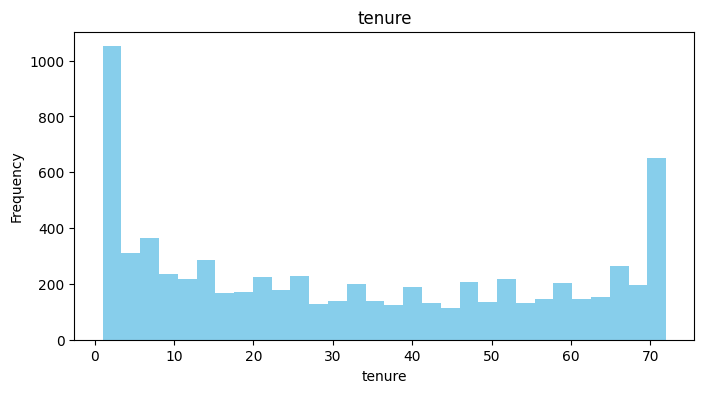

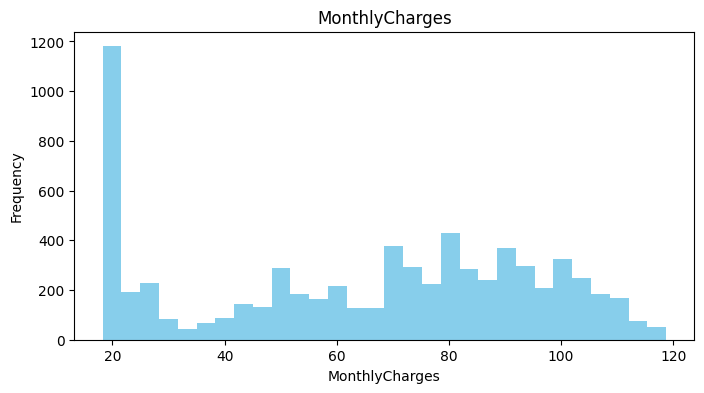

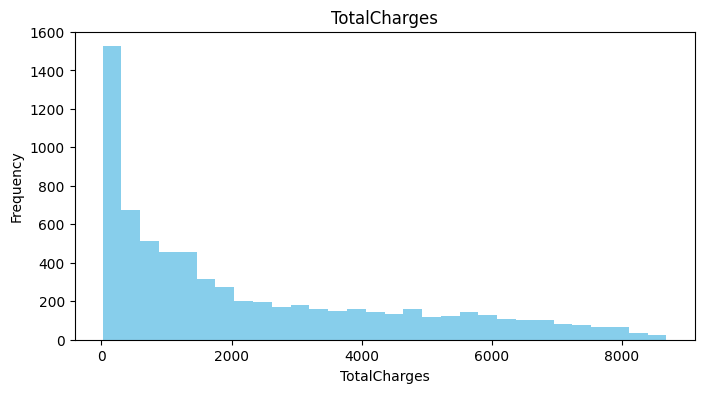

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Numeric Columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

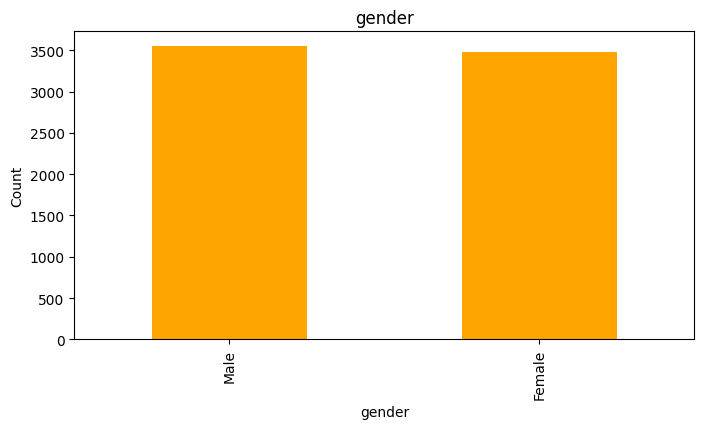

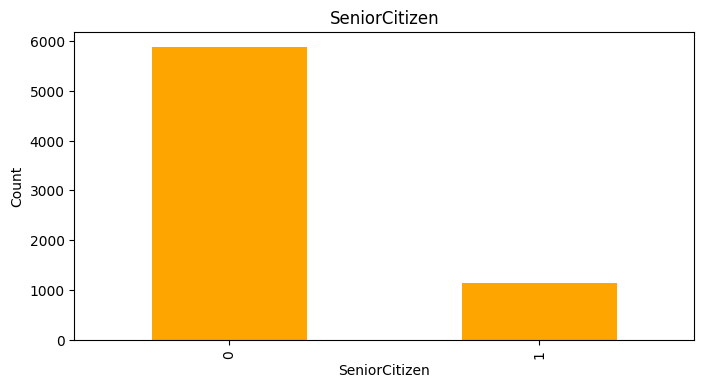

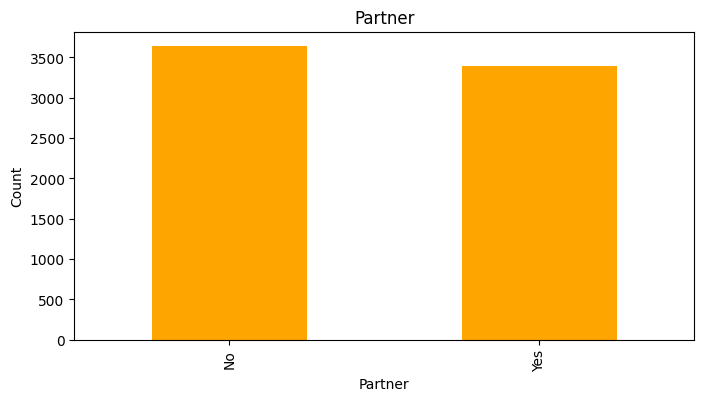

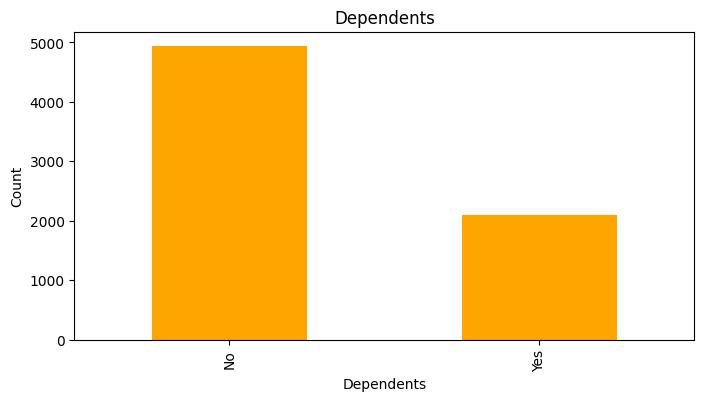

In [19]:
# Categorical Columns
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='orange')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


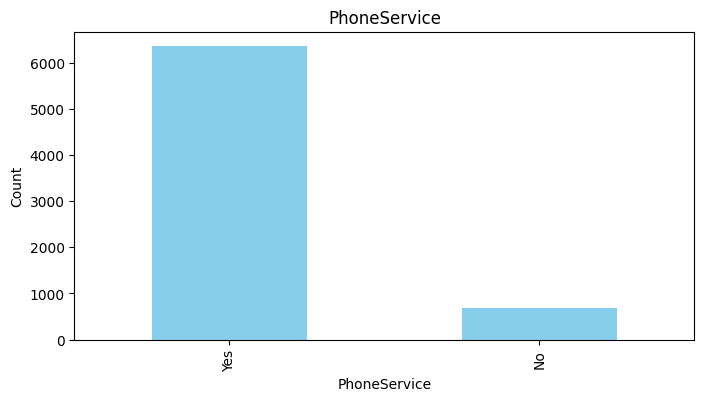

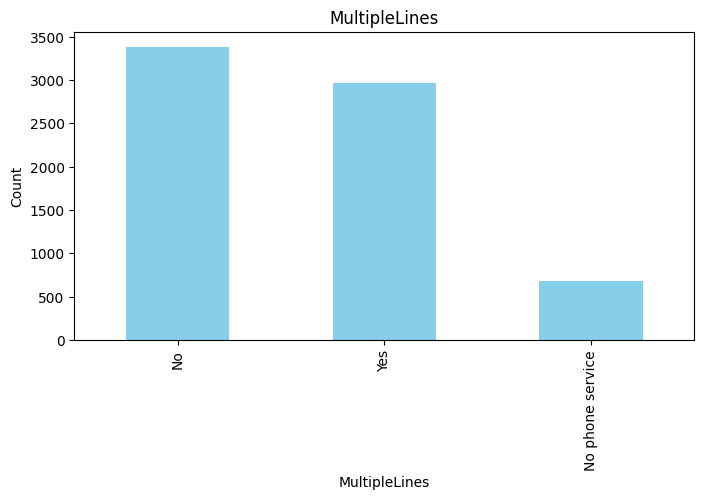

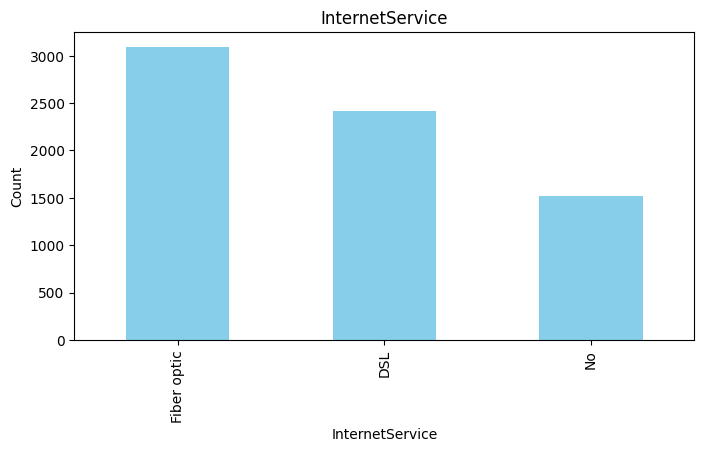

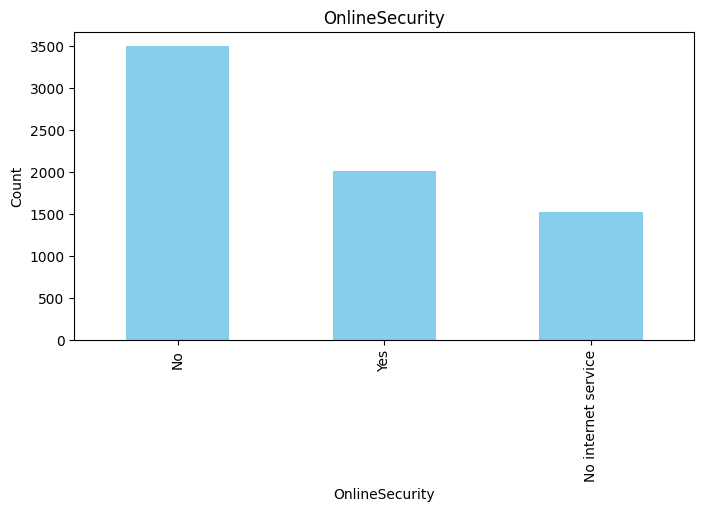

In [20]:
categorical_columns = ['PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

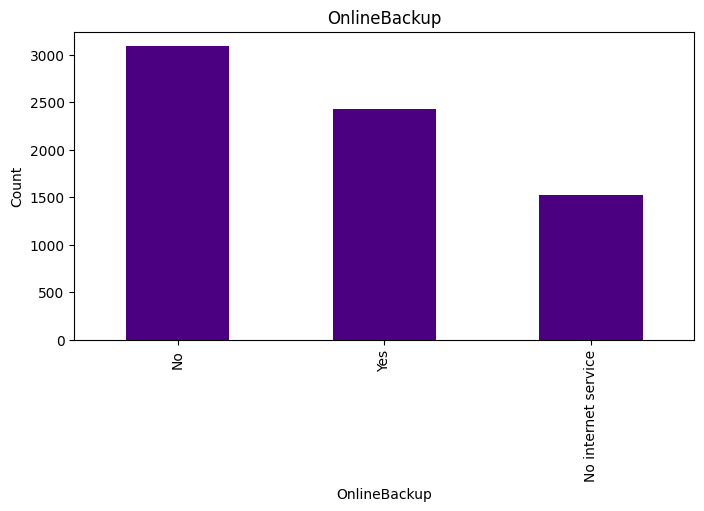

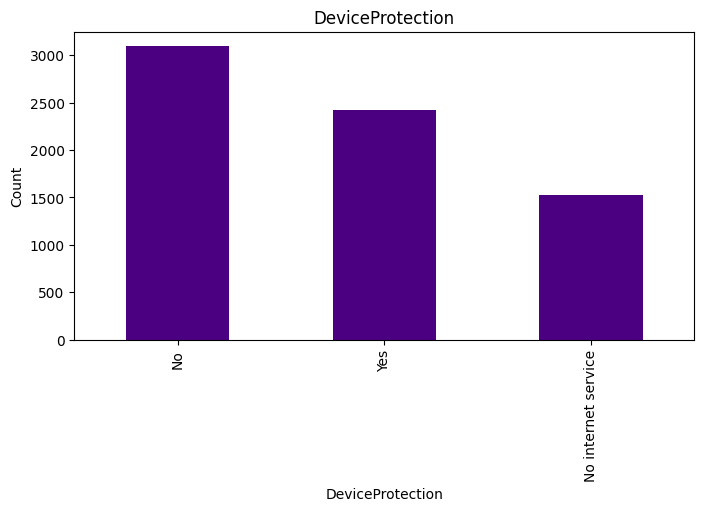

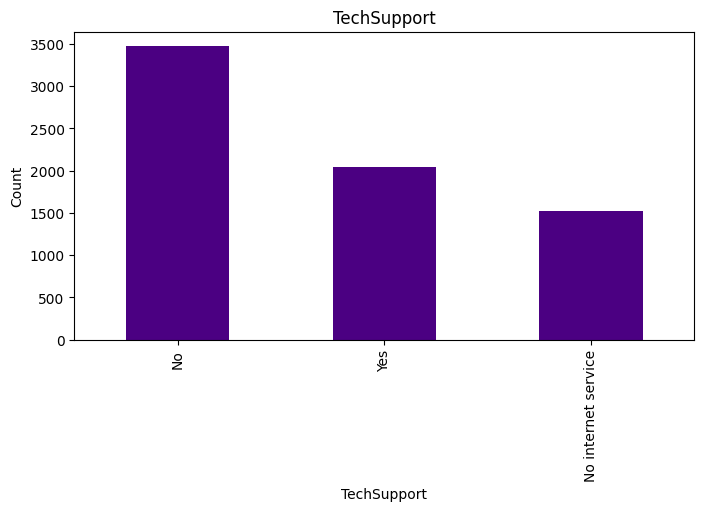

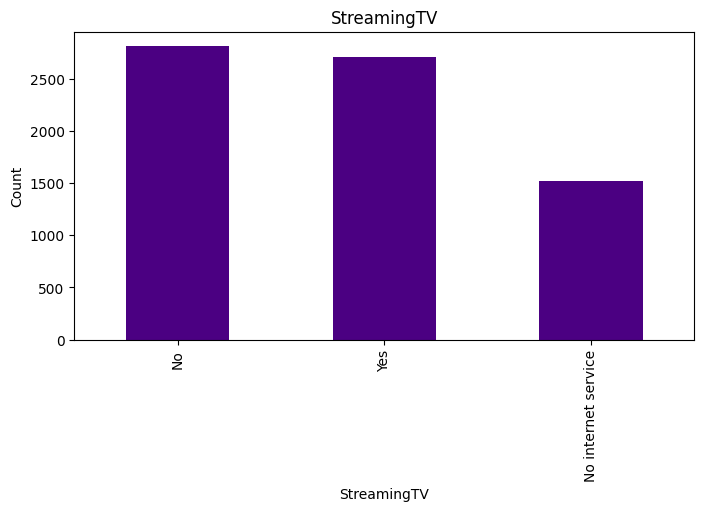

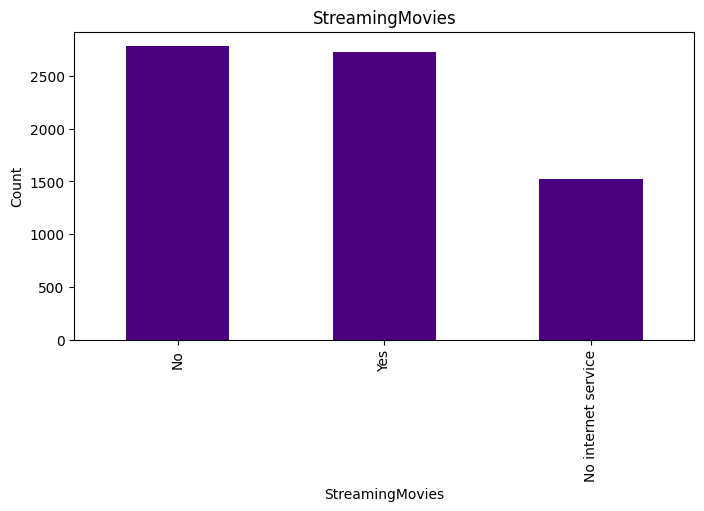

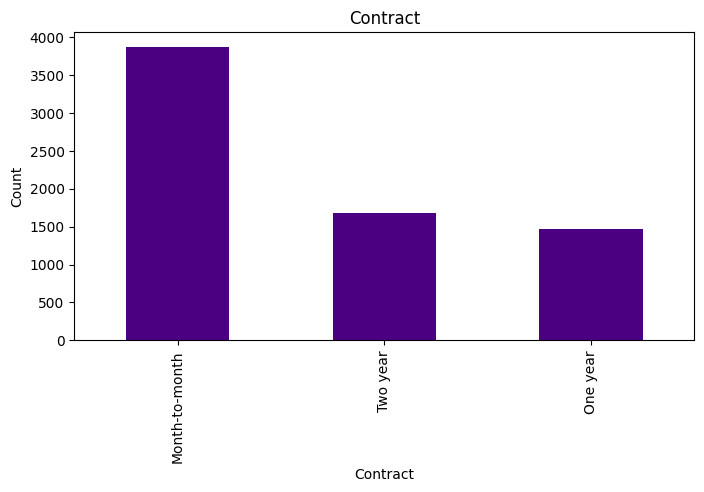

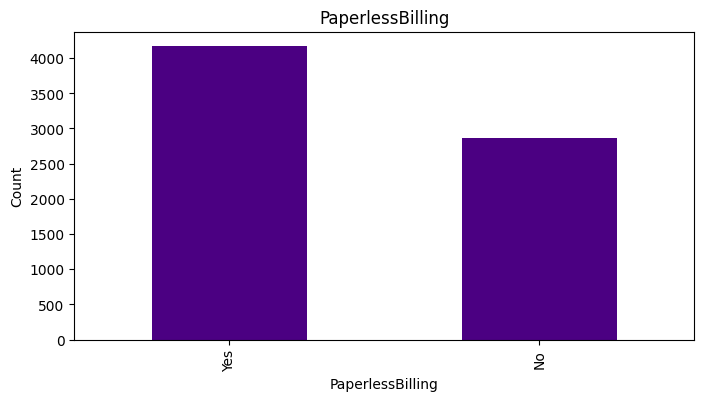

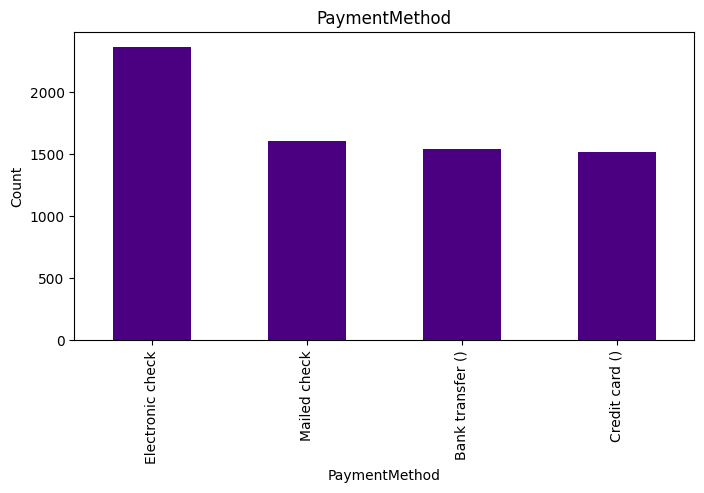

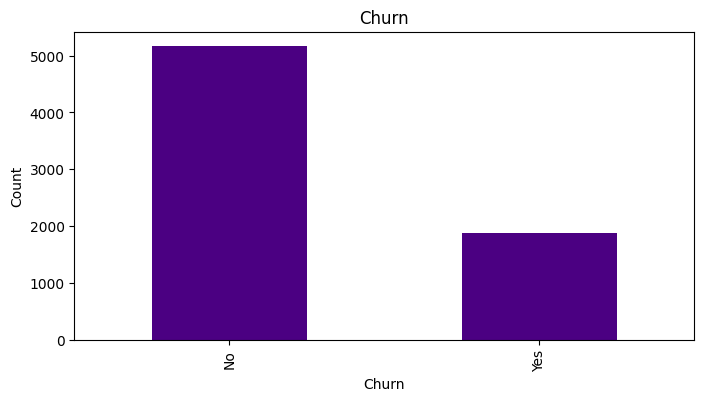

In [21]:
categorical_columns = ['OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='indigo')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

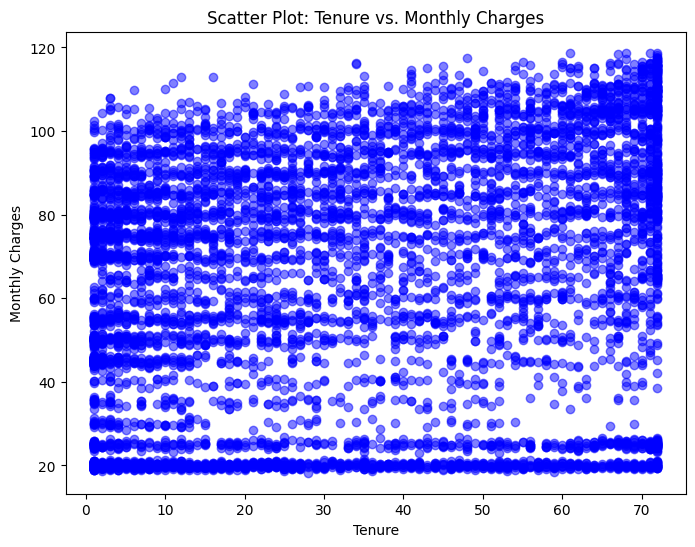

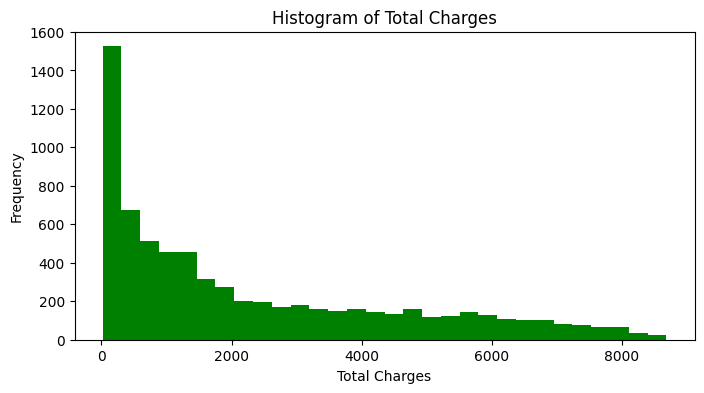

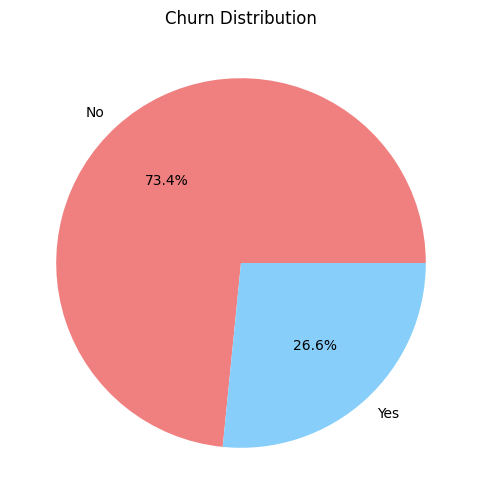

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], alpha=0.5, color='b')
plt.title('Scatter Plot: Tenure vs. Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

# Histogram
plt.figure(figsize=(8, 4))
plt.hist(df['TotalCharges'], bins=30, color='g')
plt.title('Histogram of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

# Pie Chart
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Churn Distribution')
plt.show()


## Feature Engineering

In [23]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


from above datset it's very clear tharr columns like Partner, Dependents, phoneservice, OnlineSecurity, DeviceProtecton, TechSupport,StreamingTV, StreamingMovies,PaperlessBilling,Churn are having two string datatype values. So i will convert them to int type values using LabelEncoding

### Label Encoding

In [24]:
columns = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'PhoneService', 'DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

label_encoding(df,columns)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,NaN,No phone service,DSL,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,NaN,No,DSL,1.0,...,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,NaN,No,DSL,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,NaN,No phone service,DSL,1.0,...,1.0,1.0,0.0,0.0,One year,0,Bank transfer (),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,NaN,No,Fiber optic,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,NaN,Yes,DSL,1.0,...,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,NaN,Yes,Fiber optic,0.0,...,1.0,0.0,1.0,1.0,One year,1,Credit card (),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,NaN,No phone service,DSL,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,NaN,Yes,Fiber optic,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1


In [25]:
df['gender'] = df['gender'].map({"Male":1, "Female":0})

In [26]:
df.drop(['customerID','PhoneService','gender' ,'MultipleLines', 'TotalCharges'],axis = 'columns',inplace = True)

now all the columns with Yes and No string values are labelled into 1 and 0. 

Now we need to deal with the multiple string valued columns. That can be achieved through one hot encoding.

### one hot Encoding

In [27]:
features_ohe = ["InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

In [28]:
df_ohe

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingTV_1.0,StreamingMovies_0.0,StreamingMovies_1.0,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (),PaymentMethod_Credit card (),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,0,True,False,False,...,False,True,False,True,False,False,False,False,True,False
1,0,0,0,34,0,56.95,0,True,False,False,...,False,True,False,False,True,False,False,False,False,True
2,0,0,0,2,1,53.85,1,True,False,False,...,False,True,False,True,False,False,False,False,False,True
3,0,0,0,45,0,42.30,0,True,False,False,...,False,True,False,False,True,False,True,False,False,False
4,0,0,0,2,1,70.70,1,False,True,False,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,0,True,False,False,...,True,False,True,False,True,False,False,False,False,True
7039,0,1,1,72,1,103.20,0,False,True,False,...,True,False,True,False,True,False,False,True,False,False
7040,0,1,1,11,1,29.60,0,True,False,False,...,False,True,False,True,False,False,False,False,True,False
7041,1,1,0,4,1,74.40,1,False,True,False,...,False,True,False,True,False,False,False,False,False,True


It is essential that all the column values are scaled within the range  0 to 1 for the effective training and predictions. That can be achieved by the minmax scaler

### MinMax Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

features_mms = ["tenure","MonthlyCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

scaler = MinMaxScaler(feature_range=(0,1))
rescaled_feature = scaler.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)
df

,tenure,MonthlyCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingTV_1.0,StreamingMovies_0.0,StreamingMovies_1.0,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (),PaymentMethod_Credit card (),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0,1,0,1,0,True,False,False,...,False,True,False,True,False,False,False,False,True,False
1,0.464789,0.385075,0,0,0,0,0,True,False,False,...,False,True,False,False,True,False,False,False,False,True
2,0.014085,0.354229,0,0,0,1,1,True,False,False,...,False,True,False,True,False,False,False,False,False,True
3,0.619718,0.239303,0,0,0,0,0,True,False,False,...,False,True,False,False,True,False,True,False,False,False
4,0.014085,0.521891,0,0,0,1,1,False,True,False,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.323944,0.662189,0,1,1,1,0,True,False,False,...,True,False,True,False,True,False,False,False,False,True
7039,1.000000,0.845274,0,1,1,1,0,False,True,False,...,True,False,True,False,True,False,False,True,False,False
7040,0.140845,0.112935,0,1,1,1,0,True,False,False,...,False,True,False,True,False,False,False,False,True,False
7041,0.042254,0.558706,1,1,0,1,1,False,True,False,...,False,True,False,True,False,False,False,False,False,True


# Upsampling 

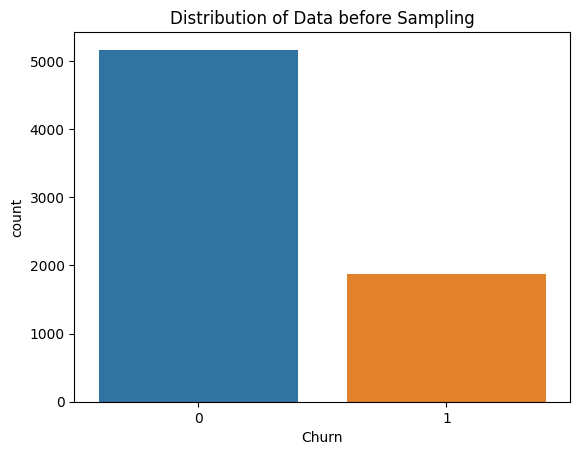

In [30]:
sns.countplot(df, x="Churn").set_title('Distribution of Data before Sampling');

In [31]:
X_no = df[df['Churn'] == 0]

X_yes = df[df['Churn'] == 1]

print(f'No : {len(X_no)} | Yes : {len(X_yes)}')

No : 5163 | Yes : 1869


In [32]:
# Yes Needs Upscaling
X_yes_upsample = X_yes.sample(n = len(X_no), replace = True, random_state = 42)
print(f'Upsampled Yes : {len(X_yes_upsample)}')

Upsampled Yes : 5163


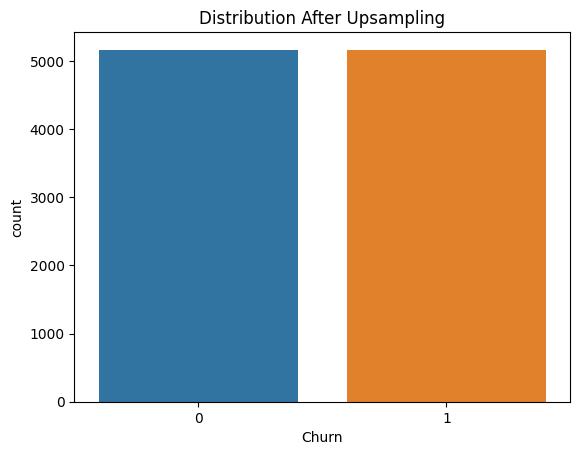

In [33]:
df_new_row = pd.DataFrame(X_yes_upsample)
# df = pd.concat([df, df_new_row])
df = pd.concat([X_no, df_new_row])
sns.countplot(df,x='Churn').set_title('Distribution After Upsampling');

## Training and splitting

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(['Churn'],axis='columns')
y = df.Churn

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8260, 29), (2066, 29), (8260,), (2066,))

### Model Selection and Model Evaluation

model can be selected based on the type of the data you are dealing with. Based on the dataset you have you need to select the relavent algorithm. The model can be evaluated on the metrics like precision, recall, accuracy which is nothing but confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

Here i am writing the confusion matric function for a particular model where it takes all the trianing and testing data for evaluating the model

In [39]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    
    cm = confusion_matrix(y_pred, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()
    
    print(f"accuracy score test_data = {accuracy_score(y_pred, y_test)}")
    print(f"accuracy score train_data = {classifier.score(X_train, y_train)}")

For churn Prediction i take all the classification algorithms into consideration like


# logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(max_iter=1000)
model_1.fit(X_train, y_train)
y_pred_logistic = model_1.predict(X_test)

In [41]:
y_pred_logistic

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

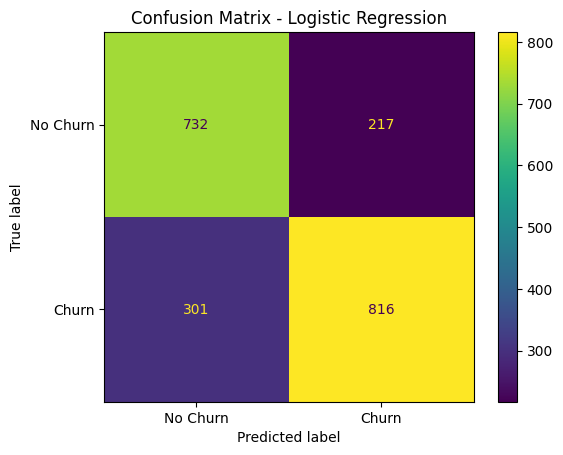

accuracy score test_data = 0.7492739593417231
accuracy score train_data = 0.7650121065375303


In [42]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred_logistic, model_1, 'Logistic Regression')

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='gini', max_depth = 3)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
y_pred_tree = model_2.predict(X_test)
y_pred_tree

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

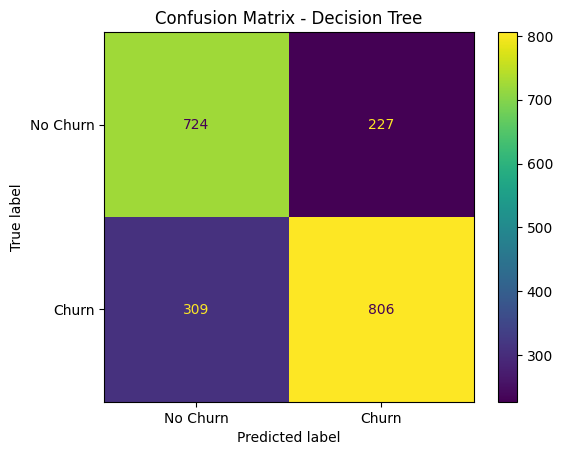

accuracy score test_data = 0.7405614714424008
accuracy score train_data = 0.7623486682808717


In [45]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred_tree, model_2, 'Decision Tree')

# Random Forest

In [46]:
# from sklearn.ensemble import RandomForestClassifier
# model_3 = RandomForestClassifier(n_estimators=100,random_state=42)
# model_3.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth = 10).fit(X_train, y_train)

y_prediction = rfc.predict(X_train)

print(f'Accuracy of Random Forest Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

y_prediction = rfc.predict(X_test)

print(f'Accuracy of Random Forest Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Random Forest Classifier on Train Set : 88.63%
Accuracy of Random Forest Classifier on Test Set : 83.54%


# Support Vector Machine(SVM)

In [47]:
from sklearn.svm import SVC
model_4 = SVC(kernel='linear', C=1.0)
model_4.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
y_pred_svm = model_4.predict(X_test)
y_pred_svm

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

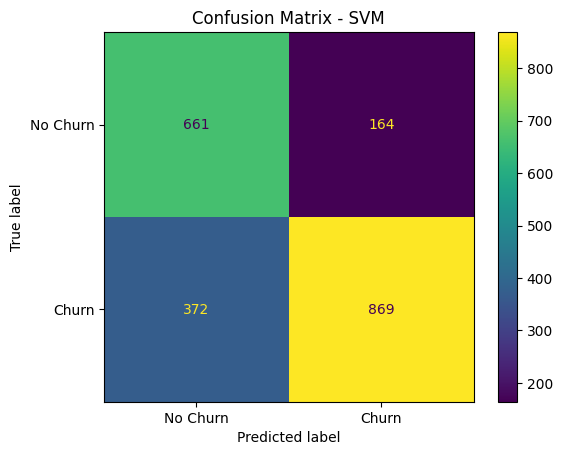

accuracy score test_data = 0.7405614714424008
accuracy score train_data = 0.7428571428571429


In [49]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred_svm, model_4, 'SVM')

# Neural Networks

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# %pip install keras
# %pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [52]:
# Build a neural network model
model_6 = Sequential()
model_6.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model_6.add(Dense(units=32, activation='relu'))
model_6.add(Dense(units=1, activation='sigmoid'))

In [53]:
# Compile the model
model_6.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model_6.fit(X_train, y_train, epochs=20, batch_size=64, verbose=2)

Epoch 1/20
130/130 - 3s - loss: 0.5431 - accuracy: 0.7231 - 3s/epoch - 21ms/step
Epoch 2/20
130/130 - 0s - loss: 0.4870 - accuracy: 0.7637 - 194ms/epoch - 1ms/step
Epoch 3/20
130/130 - 0s - loss: 0.4781 - accuracy: 0.7684 - 182ms/epoch - 1ms/step
Epoch 4/20
130/130 - 0s - loss: 0.4754 - accuracy: 0.7707 - 186ms/epoch - 1ms/step
Epoch 5/20
130/130 - 0s - loss: 0.4704 - accuracy: 0.7741 - 168ms/epoch - 1ms/step
Epoch 6/20
130/130 - 0s - loss: 0.4672 - accuracy: 0.7776 - 183ms/epoch - 1ms/step
Epoch 7/20
130/130 - 0s - loss: 0.4658 - accuracy: 0.7740 - 208ms/epoch - 2ms/step
Epoch 8/20
130/130 - 0s - loss: 0.4627 - accuracy: 0.7823 - 235ms/epoch - 2ms/step
Epoch 9/20
130/130 - 0s - loss: 0.4582 - accuracy: 0.7808 - 220ms/epoch - 2ms/step
Epoch 10/20
130/130 - 0s - loss: 0.4566 - accuracy: 0.7785 - 203ms/epoch - 2ms/step
Epoch 11/20
130/130 - 0s - loss: 0.4521 - accuracy: 0.7854 - 202ms/epoch - 2ms/step
Epoch 12/20
130/130 - 0s - loss: 0.4506 - accuracy: 0.7846 - 199ms/epoch - 2ms/step
Epo

In [54]:
# Make predictions on the test set and convert to binary predictions
y_pred = model_6.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

65/65 [==============================] - 1s 2ms/step


In [55]:
# Evaluate the model using binary predictions
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7628267182962246
Precision: 0.7413333333333333
Recall: 0.8073572120038722
F1 Score: 0.772937905468026


# Grid Search Cross Validation

In [56]:
from sklearn.model_selection import GridSearchCV

parameters  = {'n_estimators' : [150, 200, 250, 300], 'max_depth' : [15, 20, 25]}

gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(X_train,y_train)
# Best Parameters :

gsv_rfc.best_params_

{'max_depth': 25, 'n_estimators': 250}

In [57]:
# Best Score :

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 87.75%


In [58]:
gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(X,y)

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 89.79%
